In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplot
import seaborn as sns
import re

In [68]:
#read in the csv data file via Panda and assign it to the dataframe 'df'
df_train=pd.read_csv('train.csv').set_index('PassengerId')
df_final_test=pd.read_csv('test.csv').set_index('PassengerId')
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
#split the column 'Name' in two by the delimiter ','
def process_data(df):
    new = df['Name'].str.split(',', n=1, expand=True)
    df['First_Mid_Name'] = new[1].str.strip()
    df['Last_Name'] = new[0].str.strip()
    
    #Derive title column from first_mid_name column
    df['Title'] = df['First_Mid_Name'].str.findall(r'^(.*?)\..', flags=re.IGNORECASE)
    df['Title'] = df['Title'].str.join('') #pulls values out of lists
    df['Title'].value_counts(ascending=False, dropna=False)
    
    #Change 'Mlle' and 'Ms' to 'Miss', 'Mme' to 'Mrs', and 'the Countess' to 'Countess'
    for num, title in enumerate(df['Title']):
        if title == 'Mlle':
            df['Title'].iloc[num] = 'Miss'
        elif title == 'Ms':
            df['Title'].iloc[num] = 'Miss'
        elif title == 'Mme':
            df['Title'].iloc[num] = 'Mrs'
        elif title == 'the Countess':
            df['Title'].iloc[num] = 'Countess'
    
    for i, n in enumerate(df.Name):
        if n == 'Stone, Mrs. George Nelson (Martha Evelyn)':
            df['Embarked'].iloc[i] = 'S'
        elif n == 'Icard, Miss. Amelie':
            df['Embarked'].iloc[i] = 'S'
            
    #Fill NaN values in Age column (find better way to do this)
#     df['Age'].fillna(value=df['Age'].median(), inplace=True) #replaced by sklearn's simple imputer below
    title_ages = dict(df.groupby('Title')['Age'].median())
    df['Age_Med'] = df['Title'].apply(lambda x: title_ages[x])
    df['Age'].fillna(df['Age_Med'], inplace=True)
    
    #Drop outliers with high prices
#     df = df[df['Fare']<= 500]

    #Drop unneeded columns
    df = df.drop(['Name', 'Last_Name', 'First_Mid_Name', 'Ticket', 'Cabin', 'Age_Med'], axis=1) #Ticket and Cabin may produce some valuable information or may be imputable based on other columns (i.e. average cost based on embarcation & class?)
    return df

In [ ]:
#Preprocess training data
df_train = process_data(df_train)
df_train.head()

# __Other Ideas for Features:__

* Number of cabins purchased
* Fill cabin information based on fare
* Research more into the ticket information
* Cabin level (Deck) - would need a lot of values imputed, and would them most likely reflect information already in the `Ticket` column
* Room number - could be some indicator of forward-aft location on the ship?, but otherwise may not provide much predictive power)

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       888 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
 8   Title     888 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.4+ KB


In [76]:
#Pre-process test data
df_final_test = process_data(df_final_test)
df_final_test.head()

C:\Users\Lofgran\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,Mr
893,3,female,47.0,1,0,7.0000,S,Mrs
894,2,male,62.0,0,0,9.6875,Q,Mr
895,3,male,27.0,0,0,8.6625,S,Mr
896,3,female,22.0,1,1,12.2875,S,Mrs


In [77]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Title     418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


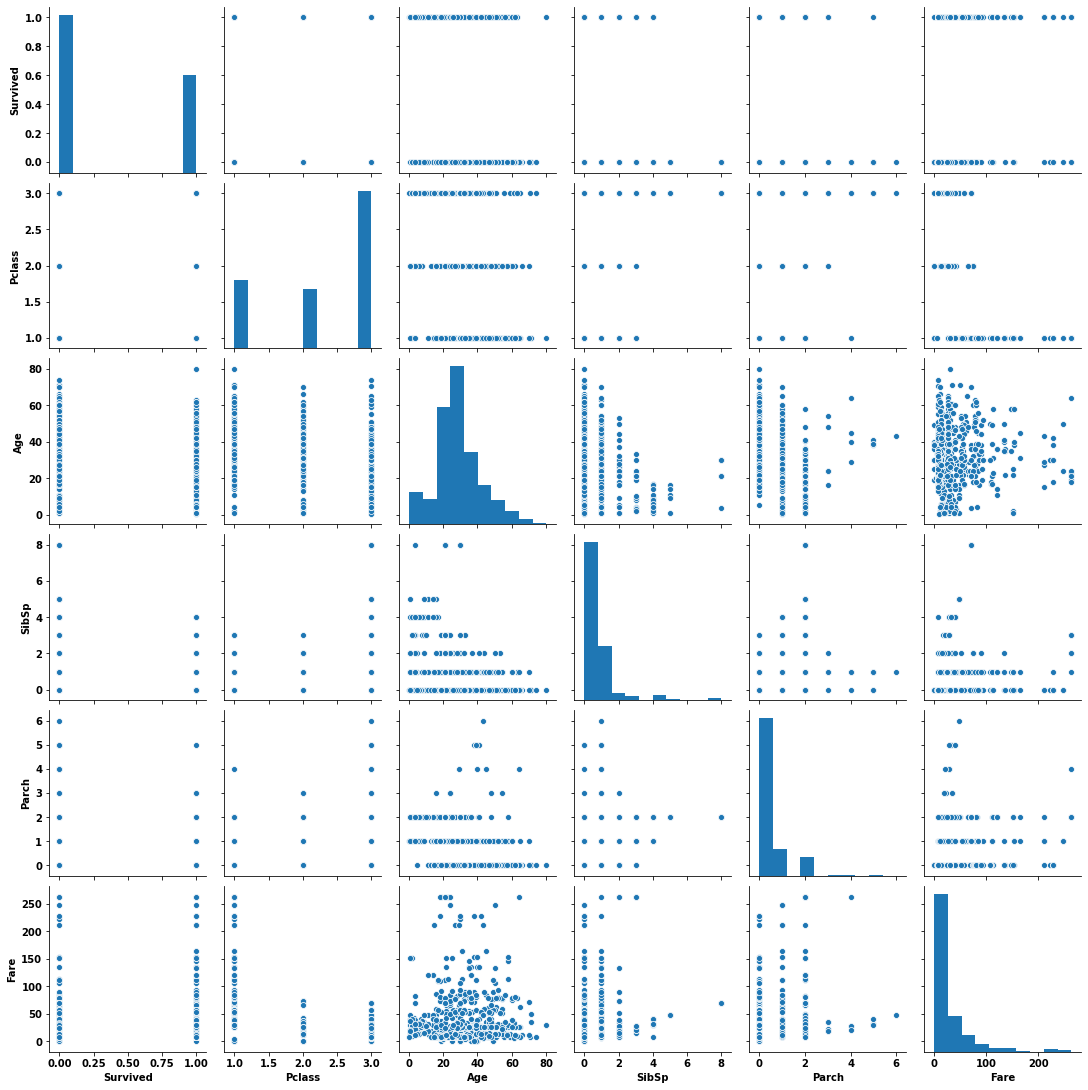

In [6]:
import seaborn as sns
#Pairplot identifies 3 individuals that paid an exorbitant rate and probably are not good predictors (even though they got first class)
sns.pairplot(df_train)

In [7]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    416 non-null    int64  
 1   Sex       416 non-null    object 
 2   Age       416 non-null    float64
 3   SibSp     416 non-null    int64  
 4   Parch     416 non-null    int64  
 5   Fare      416 non-null    float64
 6   Embarked  416 non-null    object 
 7   Title     416 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.2+ KB


In [79]:
#Train_test_split of original dataset (for scoring purposes)
X_train, X_validate, y_train, y_validate = train_test_split(df_train.drop('Survived', axis=1), 
                                                    df_train['Survived'], 
                                                    test_size = 0.33, 
                                                    random_state=42)

In [102]:
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, average_precision_score, classification_report, auc, roc_curve, plot_roc_curve#, auc, plot_roc_curve

import matplotlib.pyplot as plt

#Funciton containing fitting and predicting methods for data
def run_predictions(X_train, y_train, X_validate, y_validate, estimator, param_grid):
    #Train_test_split of original dataset (for scoring purposes)
#     X_train, X_validate, y_train, y_validate = train_test_split(df.drop('Survived', axis=1), 
#                                                         df['Survived'], 
#                                                         test_size = 0.33, 
#                                                         random_state=42)
    
    #Create a column transformer to impute missing values and one-hot encode specific columns
    ct = ColumnTransformer(
                           [('imputer', SimpleImputer(missing_values=np.nan, strategy='median'), [2]), #Impute missing values for Age column --> functionality improved in function above, so no longer needed
                            ("one_hot", OneHotEncoder(categories='auto', sparse=False), slice(1, 6, 7))]) #Encode Sex, Embarked, & Title columns

    #Create a pipeline for the column transformer and logistic regressor
    pipe = Pipeline(steps=[('encoding', ct),
                           ('scaler', StandardScaler()),
                           ('estimator', estimator)])#max_iter=maximum number of iternations taken for the solvers to converge; tol=tolerance for stopping criteria

    #Define hyperparameter variables to test
    param_grid = param_grid

    #Set up cross-validating grid search
    clf = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=False, n_jobs=-1) #5 fold cross-validation; n_jobs=use all processors

    #Train model, and determine predictions
    fitted = clf.fit(X_train, y_train)
    predictions = fitted.predict(X_validate)

    #Scoring methods
    
    #Precision & Recall (important when significanlty more of one class than another in the data set)
    print('Classification_report: ', '\n', classification_report(y_validate, predictions))
    print('Precision score: ', precision_score(y_validate, predictions))
    print('Recall score: ', recall_score(y_validate, predictions))    
    #ROC Curve
    ax = plt.gca()
    plt.title('ROC Curve')
    roc_plot = plot_roc_curve(clf, X_validate, y_validate, ax=ax, alpha=0.8)      
#     print('F1 score: ', f1_score(y_validate, predictions))
#     print('Brier score: ', brier_score_loss(y_validate, predictions))


## __Metrics__
__ROC Curve__ - The top-left corner of the ROC plot is the "ideal point", as it indicates that the model has a 100% True-positive rate, and a 0% False-positive rate.  This, however, is not realistic.  It does, however, teach us that we should seek to maximize the area under the curve (AUC) when working to optimize our classifiers.  We also want to be sure to maximize true positives while minimizing false-positives, and therefore the rate of change between the two (the "steepness" of the line) is also important.

__Classification Report__ - For each class (0 - did not survive, and 1 - survived, in this case), 

__Precision__ - a measure of result relevancy (high precision = low false-positive rate)

__Recall__ - a measure of how many truly relevant results are returned (high recall = low false-negative rate)


# __Naive Bayes__
__Explanation:__ A classification algorithm that determines the probability that the test data belogs to a particular class.  In doing so, it assumes each feature in the data is unrelated to the others.  In other words, it "naively' assumes each feature in the model contributes independently to the probability of the label. This is considered a generative model, and works by utilizing the dataset's distributions to correctly categorize the label data.

__Benefits:__ Easy to build, very fast compared to other classification algorithms, has historically outperformed other sophisticated classification methods.

__Costs:__ Doesn't do well with categories in the test dataset that were not in the traiing dataset (though this can be solved via a smoothing parameter*); Probability outputs are not of much value, as Bayes is known to be a 'bad estimator'; the assumption of independent features is weak in the real world.

__Best for:__ Real-time prediction, mult-class prediction, text classification, spam filtering, sentiment analysis, recommendation system (together with collaborative filtering)

__*__Multinomial Naive Bayes algorithm uses an Additive (Laplace/Lidstone) smoothing parameter 'alpha' which eliminates the ("Zero Frequency") problem that occurs when the test data set has a categorical variable that the training dataset does not have (thus resulting in the model assigning 0 probability to that category).
This isn't a problem with this dataset (as it uses binomial category for the label represented in both the test and training datasets), but is valuable to know in the future

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       176
           1       0.80      0.73      0.76       118

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294

Precision score:  0.7962962962962963
Recall score:  0.7288135593220338


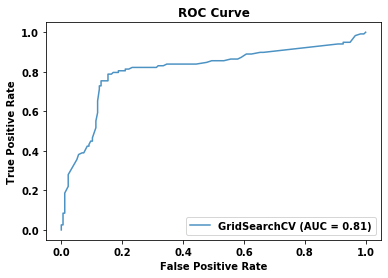

In [44]:
from sklearn.naive_bayes import GaussianNB
param_grid = {
              
              }
run_predictions(df_train, GaussianNB(), param_grid)

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       176
           1       0.80      0.73      0.76       118

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294

Precision score:  0.7962962962962963
Recall score:  0.7288135593220338


C:\Users\Lofgran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


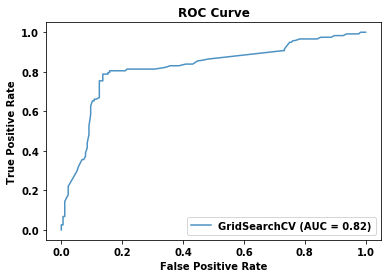

In [14]:
#Multinomial Naive Bayes algorithm allows for the implementation of an alpha parameter
from sklearn.naive_bayes import MultinomialNB
param_grid = {
              'estimator__alpha':[0, 0.01, 0.1, 0.3, 0.5, 0.75, 1.0]
              }
run_predictions(df_train, MultinomialNB(), param_grid)

# __Logistic Regression as a Classifier__
__Explanation:__ Predictions are made by estimating the probability that a new set of inputs belongs to each class (using Bayes theorem).  The class with the highest probability for each datapoint is the one assigned to the output. This is a discriminative model, and thus works by determining where the boundaries in the dataset exist.

__Cons:__ Typically only used for binary classificaiton problems; unstable with well-separated classes; unstable with small training sets; assumes a Gaussian (normal) distribution of data; assumes each feature has the same variance; cannot solve non-linear problems (since it's decision-surface is linear)

__Pros:__ Coefficients are meaningful (by direction - positive/negative - and value); simple algorithm; not computationally intensive; input features don't need to be scaled; easy to regularize (?); outputs well-calibrated predicted probabilities

__Best for:__ 

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       176
           1       0.80      0.73      0.76       118

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294

Precision score:  0.7962962962962963
Recall score:  0.7288135593220338


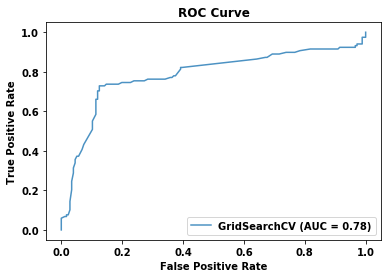

In [15]:
from sklearn.linear_model import LogisticRegression

param_grid = {
              #'estimator__iid':[True],
              'estimator__max_iter':[1000, 10000],
              'estimator__tol':[0.01, 0.1, 1],
              'estimator__class_weight':[None, 'balanced'],
              'estimator__solver':['lbfgs', 'liblinear', 'newton-cg']
             }
run_predictions(df_train, LogisticRegression(), param_grid)

# __K-Nearest Neighbors Classifier__
__Explanation:__ This method goes to each datapoint, selects the 'k' number of closest datapoints, and assigns a class based on the majority-class of those surrounding datapoints.

__Cons:__ Slow when many observations; features should be normalized so that their scale doesn't overstate the variable's importance; subject to potentially high variance; a model is not created, and thus it stores only instances of the training data

__Pros:__ Easy to use (no hyperparameters required); simple algorithm; low bias; 

__Best for:__ Outlier detection (fraud), 

__*Note:__ A larger 'k' value supresses noise, but also makes classification boundaries less distinct.  A k-value of 1, for each datapoint, will select that point itself as it's nearest neighbor, and will thus 'overfit'.

Classification_report:  
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       176
           1       0.76      0.71      0.74       118

    accuracy                           0.80       294
   macro avg       0.79      0.78      0.79       294
weighted avg       0.79      0.80      0.79       294

Precision score:  0.7636363636363637
Recall score:  0.711864406779661


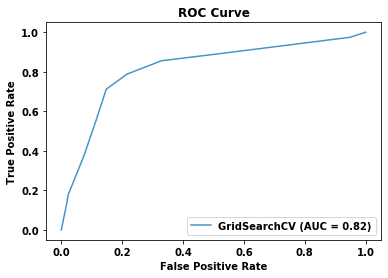

In [16]:
from sklearn.neighbors import KNeighborsClassifier
param_grid={
            'estimator__n_neighbors':list(range(1, 50)),
            'estimator__weights':['uniform', 'distance'],
            'estimator__algorithm':['ball_tree', 'kd_tree'],
            'estimator__leaf_size':[10, 100, 1000, 10000],
            'estimator__n_jobs':[-1]
            }
run_predictions(df_train, KNeighborsClassifier(), param_grid)

# __Decision Tree Classifier__
__Explanation:__ The training dataset is subdivided into smaller and smaller pieces by the algorithm until it meets the specifications of the hyperparameters.  Each branching in the tree illustrates a decision that was made by the algorithm in subdividing the dataset.  

__Cons:__ May create overly-complex trees that don't generalize well; can be unstable due to small variations in the data (mitigated by ensemble); tree may be biased if some classes dominate the data (can be mitigated by balancing the dataset)

__Pros:__ Simple algorithm; trees can be visualized (white-box model); little data prep required; cost of predicting is logarithmic in the number of datapoints used to train the tree; can validate using statistical tests (determine reliability); performs well even if assumptions are somewhat violated by teh true model from which data were generated

__Best for:__ 

Classification_report:  
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       176
           1       0.75      0.66      0.70       118

    accuracy                           0.78       294
   macro avg       0.77      0.76      0.76       294
weighted avg       0.77      0.78      0.77       294

Precision score:  0.75
Recall score:  0.6610169491525424


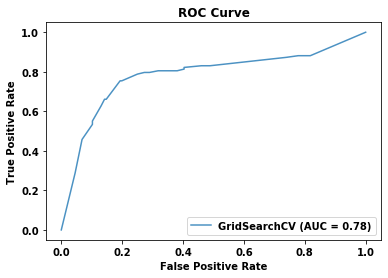

In [17]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
             
             }
run_predictions(df_train, DecisionTreeClassifier(), param_grid)

# __Random Forest__
__Explanation:__ This is an ensemble method which takes multiple decision trees built on sub-sets of the sample data, and averages them to conclude classifications for the test set.

__Cons:__ Can be memory-intensive if hyperparameters are not properly tuned; 

__Pros:__ Greater number of decision trees (`n_estimators`) will improve predictive accuracy and control over-fitting; mitigates some of the problems with a standard decision tree model;  

__Best for:__ 

Classification_report:  
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       176
           1       0.73      0.66      0.69       118

    accuracy                           0.77       294
   macro avg       0.76      0.75      0.75       294
weighted avg       0.76      0.77      0.76       294

Precision score:  0.7289719626168224
Recall score:  0.6610169491525424


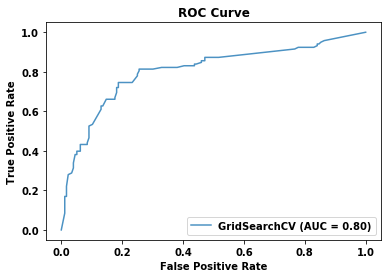

In [18]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
              'estimator__n_estimators':[10, 50, 100, 150, 200, 250, 500, 1000],
              'estimator__n_jobs':[-1]
              }
run_predictions(df_train, RandomForestClassifier(), param_grid)

# __Linear Discriminant Analysis__
__Explanation:__ This is a classifier with a linear decision boundary.  The boundary is created by reducing the dimensionality of the dataset and projecting all data points onto a line.  Then, the class of each datapoint is determined by its distance from a centroid.

__Cons:__ Simplification (reduces dimensionality) of the problem; subject to outliers; 

__Pros:__ Simplification of the problem; supports binary and multi-class classification; 

__Best for:__ Problems in whcih data has a linear relationship; problems with large multi-dimensional data (?)

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       176
           1       0.80      0.73      0.76       118

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294

Precision score:  0.7962962962962963
Recall score:  0.7288135593220338


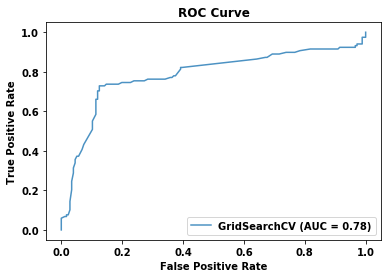

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
param_grid = {
              'estimator__solver':['svd', 'lsqr', 'eigen']
             }
run_predictions(df_train, LinearDiscriminantAnalysis(), param_grid)

C:\Users\Lofgran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classification_report:  
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       176
           1       1.00      0.01      0.02       118

    accuracy                           0.60       294
   macro avg       0.80      0.50      0.38       294
weighted avg       0.76      0.60      0.46       294

Precision score:  1.0
Recall score:  0.00847457627118644


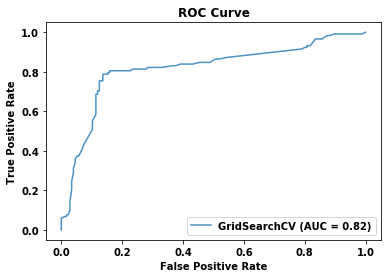

In [20]:
#Similar to the Linear Discriminant Analysis classifier, but has a quadratic decision boundary, generated by 
#fitting class conditional densities to the data and using Bayes’ rule.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
param_grid = {
             }
run_predictions(df_train, QuadraticDiscriminantAnalysis(), param_grid)

# __Support Vector Machines__
__Explanation:__ The algorithm works by drawing a line in between clusters of points and maximizing the distance in between that line and the points on either side.  Class predictions for test data are determined based on where they fall in relation to the line drawn by the algorithm.

__Cons:__ Prone to overfitting if number of features is much greater than number of samples (mitigated by chosing kernel functions and regularization term); does not provide direct probability estimates (calculated using an expensive five-fold cross-validation); support both dense and sparse sample vectors; fit time scales quadratically with the number of samples (for SVC, not LinearSVC)

__Pros:__ Effective in high-dimensional spaces; still effective in cases where the number of dimensions is greater than the number of samples; memory efficient; versatile (kernel functions - including custom functions - can be specified for the decision function)

__Best for:__ 

[LibSVM]Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       176
           1       0.80      0.73      0.76       118

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294

Precision score:  0.7962962962962963
Recall score:  0.7288135593220338


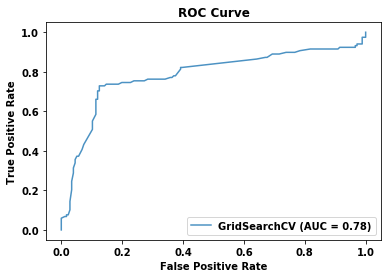

In [22]:
from sklearn.svm import SVC
param_grid = {
              'estimator__C':[0.01, 0.1, 1.0],
              'estimator__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed', 'gamma'],
              'estimator__degree':[2, 3, 5, 7],
              'estimator__shrinking':[True, False],
              'estimator__verbose':[True]
             }
run_predictions(df_train, SVC(), param_grid)

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       176
           1       0.80      0.73      0.76       118

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294

Precision score:  0.7962962962962963
Recall score:  0.7288135593220338


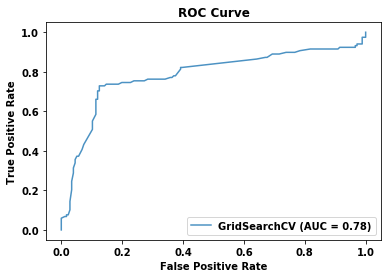

In [23]:
#Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more 
#flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
from sklearn.svm import LinearSVC
param_grid = {
              'estimator__penalty':['l1', 'l2'],
              'estimator__loss':['hinge', 'squared_hinge'],
              'estimator__dual':[True, False],
              'estimator__C':[0.01, 0.1, 1.0, 2.0, 5.0],
             }
run_predictions(df_train, LinearSVC(), param_grid)

# __Stochastic Gradient Descent Classifier__
__Explanation:__ This is a linear classifier that's trained with stochastic gradient descent (SGD). This means that the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing learning rate. 

__Cons:__ requires several hyperparameters (i.e. regularization & number of iterations); sensitive to feature scaling

__Pros:__ Works with online learning (via `partial_fit` method); supports regularization (`alpha`); simple, well-developed method; efficient; ease of implementation;

__Best for:__ 

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       176
           1       0.80      0.73      0.76       118

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294

Precision score:  0.7962962962962963
Recall score:  0.7288135593220338


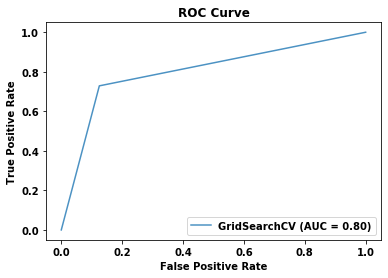

In [24]:
from sklearn.linear_model import SGDClassifier
param_grid = {
              'estimator__loss':['hinge', #(soft-margin) linear Support Vector Machine (lazy)
                                 'log', #logistic regression (lazy)
                                 'modified_huber', #smoothed hinge loss
                                 'squared_hinge', 
                                 'perceptron', 
                                 'squared_loss', 
                                 'huber', 
                                 'epsilon_insensitive', 
                                 'squared_epsilon_insensitive'],
              'estimator__penalty':['l1', 
                                    'l2', 
                                    'elasticnet'], #convex combination of L2 and L1; (1 - l1_ratio) * L2 + l1_ratio * L1.
              'estimator__alpha':[0.0001, 0.001, 0.01, 0.1, 1.0], #regularization parameter
              'estimator__shuffle':[True],
              'estimator__n_jobs':[-1],
              'estimator__early_stopping':[True]
             }
run_predictions(df_train, SGDClassifier(), param_grid)

# __Gradient (Tree) Boosting Classifier__
__Explanation:__ Trains a number (`n_estimators`) of trees in sequence, and then combines them to make sophisticated (low bias) predictions.  The trees in this case are typically 'weak learner' (very small trees with on average one split), so there's somewhat of a gradient descent approach. After each iteration, a term is added to reduce the loss function.

__Cons:__ can be slow/expensive (prediction time scales with number of features); cannot be parallelized (component predictions must be made in sequence); concern for overfitting small datasets easily; 

__Pros:__ supports binary and multi-class classification; invented to combat underfitting; 

__Best for:__ web search ranking; ecology;

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       176
           1       0.76      0.74      0.75       118

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294

Precision score:  0.7565217391304347
Recall score:  0.7372881355932204


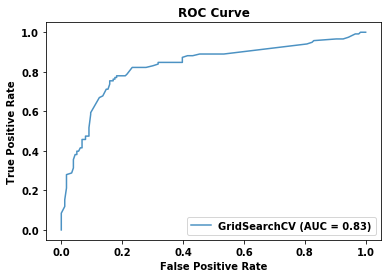

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
              'estimator__loss':['deviance', 'exponential'],
              'estimator__learning_rate':[0.01, 0.1, 1.0],
              'estimator__n_estimators':[75, 100, 200, 500, 1000],
#               'estimator__max_depth':[3, 5, 7, 10, 12], #inclusion dropped AUC
              'estimator__max_features':['auto', 'log2', None]
             }
run_predictions(df_train, GradientBoostingClassifier(), param_grid)

Classification_report:  
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       176
           1       0.78      0.75      0.76       118

    accuracy                           0.81       294
   macro avg       0.81      0.80      0.80       294
weighted avg       0.81      0.81      0.81       294

Precision score:  0.7787610619469026
Recall score:  0.7457627118644068


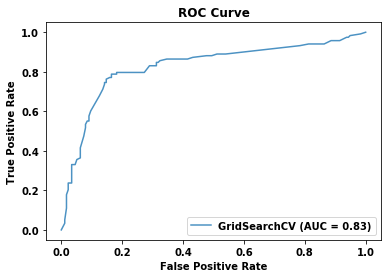

In [26]:
#Significantly faster than the Gradient Boosting Classifier above
from sklearn.experimental import enable_hist_gradient_boosting #this is an experimental method under sklearn 0.22.1
from sklearn.ensemble import HistGradientBoostingClassifier
param_grid = {
              'estimator__loss':['binary_crossentropy', 'categorical_crossentropy', 'auto'],
              'estimator__learning_rate':[0.01, 0.1, 1.0],
              'estimator__l2_regularization':[0, 0.01, 0.1, 0.5, 1.0]
              }
run_predictions(df_train, HistGradientBoostingClassifier(), param_grid)

# __Neural Network__
__Explanation:__ Multi-layer perceptron classifier; optimizes the log-loss function using LBFGS or SGD.

__Cons:__ 

__Pros:__ 

__Best for:__ 

C:\Users\Lofgran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classification_report:  
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       176
           1       0.78      0.77      0.78       118

    accuracy                           0.82       294
   macro avg       0.82      0.81      0.82       294
weighted avg       0.82      0.82      0.82       294

Precision score:  0.7844827586206896
Recall score:  0.7711864406779662


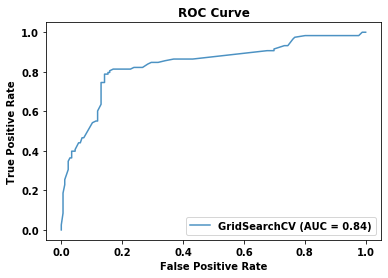

In [104]:
from sklearn.neural_network import MLPClassifier
param_grid = {
              'estimator__activation':['identity', 'logistic', 'tanh', 'relu'],
              'estimator__solver':['lbfgs', 'sgd', 'adam'],
              'estimator__alpha':[0.0001, 0.001, 0.01, 0.1, 1.0], 
              'estimator__learning_rate_init':[0.001, 0.01, 0.1], 
              'estimator__max_iter':[200, 500, 1000]
#               'estimator__verbose':[True]
              }
run_predictions(X_train, y_train, X_validate, y_validate, MLPClassifier(), param_grid)

In [105]:
from sklearn.preprocessing import StandardScaler
#Run predictions for the `final` dataset
ct = ColumnTransformer(
                           [("imputer", SimpleImputer(missing_values=np.nan, strategy='median'), [2]), #Impute missing values for Age column --> functionality improved in function above, so no longer needed
                            ("one_hot", OneHotEncoder(categories='auto', sparse=False), slice(1, 6, 7))]) #Encode Sex, Embarked, & Title columns

#Create a pipeline for the column transformer and logistic regressor
pipe = Pipeline(steps=[('encoding', ct),
                       ('scaler', StandardScaler()),
                       ('estimator', MLPClassifier())])#max_iter=maximum number of iternations taken for the solvers to converge; tol=tolerance for stopping criteria

#Define hyperparameter variables to test
param_grid = {
              'estimator__activation':['identity', 'logistic', 'tanh', 'relu'],
              'estimator__solver':['sgd', 'adam', 'lbfgs'],
              'estimator__alpha':[0.0001, 0.001, 0.01, 0.1, 1.0], 
              'estimator__learning_rate_init':[0.001, 0.01, 0.1], 
              }

#Set up cross-validating grid search
clf = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=False, n_jobs=-1) #5 fold cross-validation; n_jobs=use all processors

#Train model, and determine predictions
fitted = clf.fit(X_train, y_train)
predictions = fitted.predict(df_final_test)

C:\Users\Lofgran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [107]:
#Print final predictions
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [108]:
#Change prediction list to format that Kaggle will accept
def results_to_csv(df):
    predictions_df = pd.DataFrame(predictions, columns=['Survived'])
    predictions_df = predictions_df.rename_axis('PassengerID')
    predictions_df.index +=  892
    titanic_predictions = predictions_df.to_csv('titanic_predictions.csv')
results_to_csv(predictions)

In [110]:
#Check to be sure it's the right size for submission
predictions.size

418